In [114]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats
import scipy.special
import scipy.misc

In [115]:
x = np.linspace(0, 1, 100)

In [116]:
# Figure 3.6 (a)
a_b_prior = (2.0, 2.0)
N1 = 3
N0 = 17

In [90]:
# Figure 3.6 (b)
a_b_prior = (5.0, 2.0)
N1 = 11
N0 = 13

In [117]:
a_b_lik = (N1+1, N0+1)
a_b_post = (N1+a_b_prior[0], N0+a_b_prior[1])

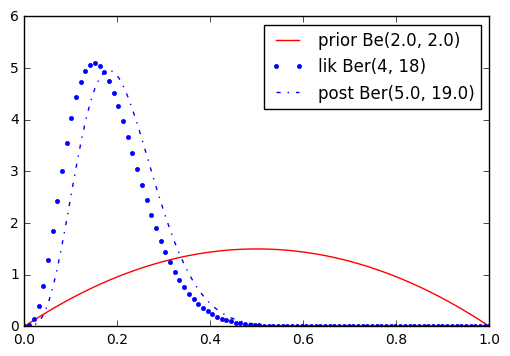

In [118]:
fig, ax = plt.subplots()
ax.plot(x, scipy.stats.beta(*a_b_prior).pdf(x), 'r', label='prior Be%s' % str(a_b_prior))
ax.plot(x, scipy.stats.beta(*a_b_lik).pdf(x), '.', label='lik Ber%s' % str(a_b_lik))
ax.plot(x, scipy.stats.beta(*a_b_post).pdf(x), 'b-.', label='post Ber%s' % str(a_b_post))
ax.legend()

http://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html

In [119]:
def likelihood_bern(theta, n, k):
    return theta**k * (1-theta)**(n-k)

In [120]:
def likelihood(theta, n, k):
    return scipy.misc.comb(n, k)*likelihood_bern(theta, n, k)

In [121]:
def my_beta_pdf(x, a, b):
    return likelihood_bern(x, (a-1)+(b-1), (a-1)) / scipy.special.beta(a, b)

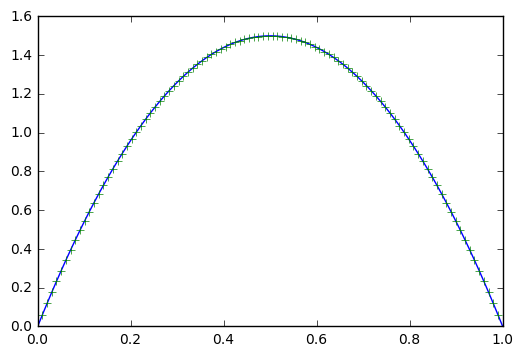

In [122]:
plt.plot(x, my_beta_pdf(x, *a_b_prior))
plt.plot(x, scipy.stats.beta(*a_b_prior).pdf(x), '+')

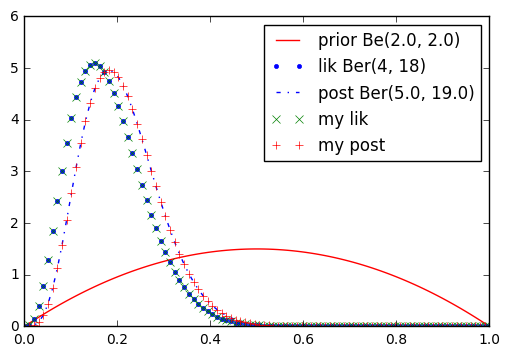

In [130]:
fig, ax = plt.subplots()
ax.plot(x, scipy.stats.beta(*a_b_prior).pdf(x), 'r', label='prior Be%s' % str(a_b_prior))
ax.plot(x, scipy.stats.beta(*a_b_lik).pdf(x), '.', label='lik Ber%s' % str(a_b_lik))
ax.plot(x, scipy.stats.beta(*a_b_post).pdf(x), 'b-.', label='post Ber%s' % str(a_b_post))
ax.plot(x, 
        my_beta_pdf(x, N1+1, N0+1),
        'x', label='my lik')
ax.plot(x, 
        scipy.stats.beta(*a_b_prior).pdf(x) * scipy.special.beta(*a_b_prior) *
        likelihood_bern(x, N1+N0, N1) / scipy.special.beta(N1+a_b_prior[0],N0+a_b_prior[1]), 
        '+', label='my post')

ax.legend()